In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Existing dataset based on the data you provided
existing_data = pd.DataFrame({
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'solar_consumption': [13.299, 17.683, 30.936, 57.336, 96.123, 121.960, 154.120, 178.734, 248.090],
    'Solar_Power_generated': [2821.91, 1171.62, 3130.36, 5658.63, 9563.69, 6750.97, 6510.06, 5628.80, 12760.50],
    'LCOE': [0.1323, 0.0866, 0.0817, 0.0746, 0.0541, 0.0428, 0.0406, 0.0367, 0.0374],
    'Prices_Avg': [2140, 1458, 1255, 1252, 889, 694, 661, 631, 640]
})

# Generate synthetic data to increase size
def generate_synthetic_data(existing_data, num_samples=100):
    synthetic_data = {
        'Year': [],
        'solar_consumption': [],
        'Solar_Power_generated': [],
        'LCOE': [],
        'Prices_Avg': []
    }

    for _ in range(num_samples):
        new_year = np.random.randint(existing_data['Year'].min(), existing_data['Year'].max() + 1)
        new_consumption = np.random.uniform(existing_data['solar_consumption'].min(), existing_data['solar_consumption'].max())
        new_power_generated = np.random.uniform(existing_data['Solar_Power_generated'].min(), existing_data['Solar_Power_generated'].max())
        new_lcoe = np.random.uniform(existing_data['LCOE'].min(), existing_data['LCOE'].max())
        new_prices_avg = np.random.uniform(existing_data['Prices_Avg'].min(), existing_data['Prices_Avg'].max())

        # Appending to synthetic data
        synthetic_data['Year'].append(new_year)
        synthetic_data['solar_consumption'].append(new_consumption)
        synthetic_data['Solar_Power_generated'].append(new_power_generated)
        synthetic_data['LCOE'].append(new_lcoe)
        synthetic_data['Prices_Avg'].append(new_prices_avg)

    return pd.DataFrame(synthetic_data)

# Generate 100 new synthetic data points
synthetic_df = generate_synthetic_data(existing_data, num_samples=100)

# Combine the synthetic data with the existing dataset
combined_df = pd.concat([existing_data, synthetic_df], ignore_index=True)

# Display the updated dataset
print(combined_df)
print(combined_df.columns)



     Year  solar_consumption  Solar_Power_generated      LCOE   Prices_Avg
0    2014          13.299000            2821.910000  0.132300  2140.000000
1    2015          17.683000            1171.620000  0.086600  1458.000000
2    2016          30.936000            3130.360000  0.081700  1255.000000
3    2017          57.336000            5658.630000  0.074600  1252.000000
4    2018          96.123000            9563.690000  0.054100   889.000000
..    ...                ...                    ...       ...          ...
104  2015          66.634720            8808.968040  0.072132  1167.949529
105  2019         187.347888            1935.734540  0.116225  1930.270958
106  2014          58.385825            7208.554429  0.038750  2067.037416
107  2019          50.721768            4812.229650  0.108403  1001.273387
108  2021         196.906823            2863.226034  0.121439   739.445727

[109 rows x 5 columns]
Index(['Year', 'solar_consumption', 'Solar_Power_generated', 'LCOE',
       

In [539]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare features and target variable
X = combined_df[['solar_consumption', 'Solar_Power_generated', 'LCOE']]
y = combined_df['Prices_Avg']

# Initialize the model
model = LinearRegression()

# Apply k-fold cross-validation (e.g., k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Print the cross-validation results
print("Cross-Validation MSE scores:", -cv_scores)
print("Average MSE:", -np.mean(cv_scores))


Cross-Validation MSE scores: [242647.56553389 144817.62030252 255560.25121224 236934.18462706
 231304.34615144]
Average MSE: 222252.7935654302


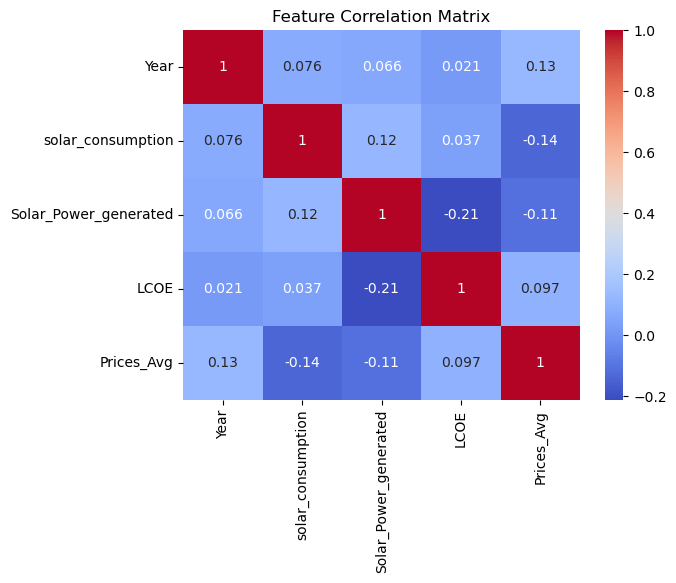

In [540]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation matrix
corr_matrix = combined_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [541]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_df[['solar_consumption', 'Solar_Power_generated', 'LCOE']])
combined_df['consumption_power_interaction'] = combined_df['solar_consumption'] * combined_df['Solar_Power_generated']


### XGBoost and GradientBoosting

In [545]:
ridge.fit(X_scaled, y)
lasso.fit(X_scaled, y)

print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)


Ridge Coefficients: [-31.59246068 -21.89290982  21.35410281]
Lasso Coefficients: [-0. -0.  0.]


In [546]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_cv_scores = cross_val_score(gbm, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

print("Gradient Boosting Average MSE:", -gbm_cv_scores.mean())


Gradient Boosting Average MSE: 324921.4746337907


In [547]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_cv_scores = cross_val_score(xgb, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

print("XGBoost Average MSE:", -xgb_cv_scores.mean())


XGBoost Average MSE: 338607.3593585461


Best Params for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best MSE for Gradient Boosting after tuning: 166234.88626114235
Test MSE: 207401.63663991523


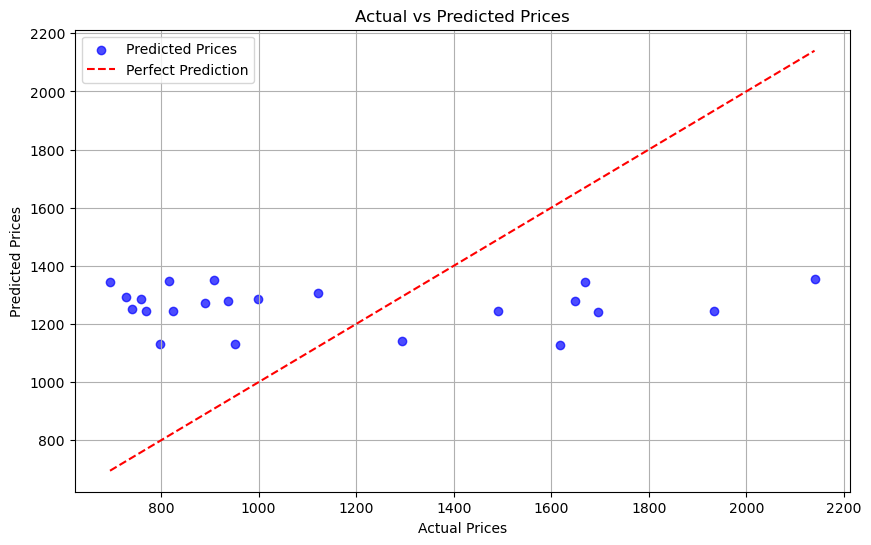

In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Existing dataset (with synthetic data)
existing_data = pd.DataFrame({
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'solar_consumption': [13.299, 17.683, 30.936, 57.336, 96.123, 121.960, 154.120, 178.734, 248.090],
    'Solar_Power_generated': [2821.91, 1171.62, 3130.36, 5658.63, 9563.69, 6750.97, 6510.06, 5628.80, 12760.50],
    'LCOE': [0.1323, 0.0866, 0.0817, 0.0746, 0.0541, 0.0428, 0.0406, 0.0367, 0.0374],
    'Prices_Avg': [2140, 1458, 1255, 1252, 889, 694, 661, 631, 640]
})

# Generate synthetic data
def generate_synthetic_data(existing_data, num_samples=100):
    synthetic_data = {
        'solar_consumption': [],
        'Solar_Power_generated': [],
        'LCOE': [],
        'Prices_Avg': []
    }

    for _ in range(num_samples):
        new_consumption = np.random.uniform(existing_data['solar_consumption'].min(), existing_data['solar_consumption'].max())
        new_power_generated = np.random.uniform(existing_data['Solar_Power_generated'].min(), existing_data['Solar_Power_generated'].max())
        new_lcoe = np.random.uniform(existing_data['LCOE'].min(), existing_data['LCOE'].max())
        new_prices_avg = np.random.uniform(existing_data['Prices_Avg'].min(), existing_data['Prices_Avg'].max())

        synthetic_data['solar_consumption'].append(new_consumption)
        synthetic_data['Solar_Power_generated'].append(new_power_generated)
        synthetic_data['LCOE'].append(new_lcoe)
        synthetic_data['Prices_Avg'].append(new_prices_avg)

    return pd.DataFrame(synthetic_data)

# Combine existing and synthetic data
synthetic_df = generate_synthetic_data(existing_data, num_samples=100)
combined_df = pd.concat([existing_data, synthetic_df], ignore_index=True)

# Prepare features and target
X = combined_df[['solar_consumption', 'Solar_Power_generated', 'LCOE']]
y = combined_df['Prices_Avg']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning with Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and MSE
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_
print("Best Params for Gradient Boosting:", best_params)
print("Best MSE for Gradient Boosting after tuning:", best_mse)

# Train the final model with the best parameters
best_gb_model = GradientBoostingRegressor(**best_params, random_state=42)
best_gb_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = best_gb_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()


Best Params for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best MSE for XGBoost after tuning: 166959.05396916287
Test MSE: 200865.51217974303


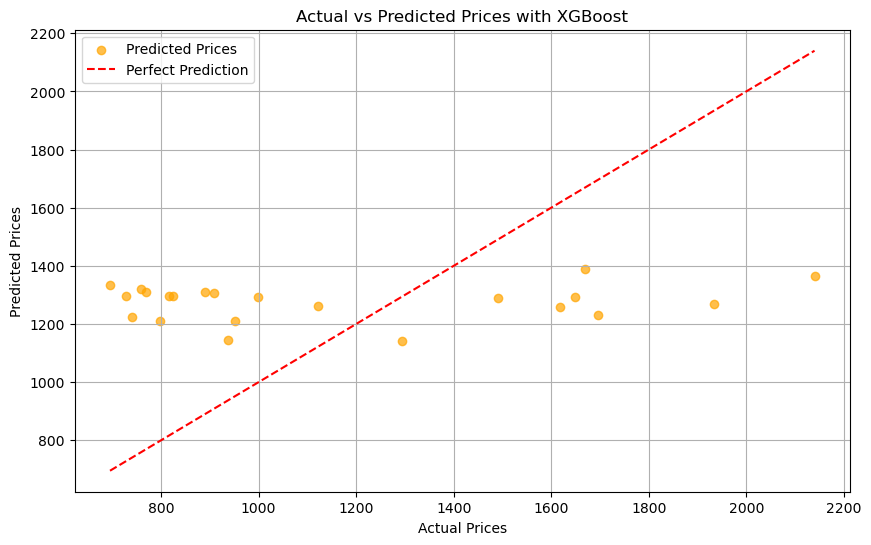

In [549]:
X = combined_df[['solar_consumption', 'Solar_Power_generated', 'LCOE']]
y = combined_df['Prices_Avg']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning with XGBoost
xgb_model = XGBRegressor(random_state=42)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]  # To prevent overfitting
}
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and MSE
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_
print("Best Params for XGBoost:", best_params)
print("Best MSE for XGBoost after tuning:", best_mse)

# Train the final model with the best parameters
best_xgb_model = XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = best_xgb_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='orange', label='Predicted Prices', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Prices with XGBoost')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

### THhis is for predicting usage using linear regression

Rows with missing or invalid Year values:
     Year  solar_consumption  Solar_Power_generated      LCOE   Prices_Avg
9     NaN         171.474403            7801.058285  0.115906  1983.828742
10    NaN         164.339687           12211.848587  0.105511  1618.873494
11    NaN         116.673000            3448.112896  0.045113   908.668348
12    NaN         101.062691            8443.292684  0.126350   740.138921
13    NaN         206.010229            5914.462407  0.079939  1527.705504
..    ...                ...                    ...       ...          ...
104   NaN         158.557364            3458.126855  0.102518  1558.810230
105   NaN         212.362662           12212.537383  0.045264   869.872654
106   NaN          85.233989            7525.035592  0.126671   865.452936
107   NaN          23.355219            5491.874578  0.068535   727.039595
108   NaN         125.325708            2836.352961  0.061903  1453.937821

[100 rows x 5 columns]
Rows with missing Year values afte

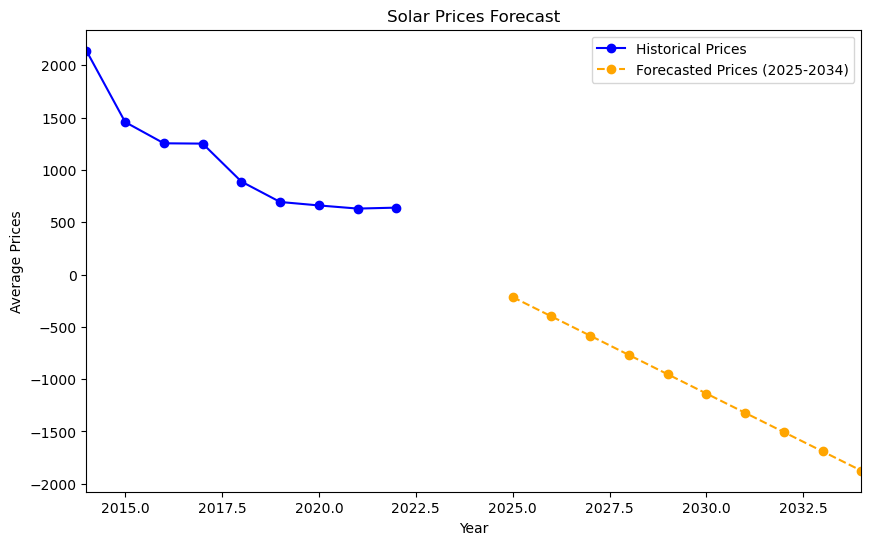

In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming combined_df is already defined and contains the relevant data
# For example, let's say you have 'Year' and 'Prices_Avg' columns in combined_df
# Make sure to use the appropriate column names that you have in your DataFrame
combined_df.head()

import pandas as pd

# Assuming combined_df is already defined

# Step 1: Identify rows with missing Year values
missing_years = combined_df[combined_df['Year'].isna()]
print("Rows with missing or invalid Year values:")
print(missing_years)

# Step 2: Remove rows with missing 'Year' values
combined_df = combined_df.dropna(subset=['Year'])

# Alternatively, if you want to fill missing values with a specific year, uncomment the line below
# combined_df['Year'].fillna(value=some_year_value, inplace=True)

# Step 3: Ensure 'Year' is of numeric type
combined_df['Year'] = pd.to_numeric(combined_df['Year'], errors='coerce')

# Step 4: Verify that there are no more missing values
missing_years_after = combined_df[combined_df['Year'].isna()]
print("Rows with missing Year values after cleaning:")
print(missing_years_after)

# Optionally, reset the index
combined_df.reset_index(drop=True, inplace=True)

# Now, you can proceed with your Linear Regression model

# Prepare the data
X = combined_df[['Year']]  # Feature: Year
y = combined_df['Prices_Avg']  # Target: Average Prices

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the training and testing set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"\nLinear Regression Training Metrics:")
print(f"R²: {r2_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"MAE: {mae_train:.4f}")

print(f"\nLinear Regression Testing Metrics:")
print(f"R²: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")

# Forecast for the next 10 years (2025-2034)
future_years = pd.DataFrame({'Year': np.arange(2025, 2035)})
future_predictions = model.predict(future_years)

# Create a DataFrame for the future predictions
future_df = pd.DataFrame(future_predictions, index=future_years['Year'], columns=['Forecasted Prices'])

# Step 4: Plotting the historical and forecasted prices
plt.figure(figsize=(10, 6))
plt.plot(combined_df['Year'], combined_df['Prices_Avg'], label='Historical Prices', color='blue', marker='o')
plt.plot(future_df.index, future_df['Forecasted Prices'], label='Forecasted Prices (2025-2034)', color='orange', linestyle='--', marker='o')

# Set x-axis limits from 2014 to 2034
plt.xlim([2014, 2034])
plt.xlabel('Year')
plt.ylabel('Average Prices')
plt.title('Solar Prices Forecast')
plt.legend()
plt.show()



XGBoost Training Metrics:
R²: 0.6510
MSE: 1963.9307
MAE: 33.5979

XGBoost Testing Metrics:
R²: 0.6481
MSE: 2281.7702
MAE: 47.7649


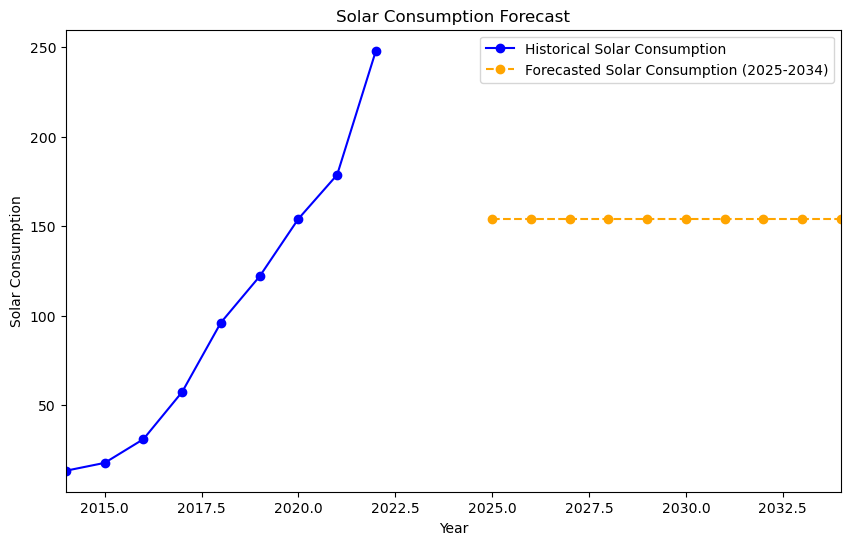

In [552]:

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Prepare the data
X = combined_df[['Year']]
y = combined_df['solar_consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
xg_model = XGBRegressor(learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8)
xg_model.fit(X_train, y_train)

# Predictions
y_pred_train = xg_model.predict(X_train)
y_pred_test = xg_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"\nXGBoost Training Metrics:")
print(f"R²: {r2_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"MAE: {mae_train:.4f}")

print(f"\nXGBoost Testing Metrics:")
print(f"R²: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")

# Forecasting future solar consumption
future_years = pd.DataFrame({'Year': np.arange(2025, 2035)})
future_predictions = xg_model.predict(future_years)

# Create a DataFrame for the future predictions
future_df_xg = pd.DataFrame(future_predictions, index=future_years['Year'], columns=['Forecasted Solar Consumption'])

# Step 4: Plotting the historical and forecasted solar consumption
plt.figure(figsize=(10, 6))
plt.plot(combined_df['Year'], combined_df['solar_consumption'], label='Historical Solar Consumption', color='blue', marker='o')
plt.plot(future_df_xg.index, future_df_xg['Forecasted Solar Consumption'], label='Forecasted Solar Consumption (2025-2034)', color='orange', linestyle='--', marker='o')

# Set x-axis limits from 2014 to 2034
plt.xlim([2014, 2034])
plt.xlabel('Year')
plt.ylabel('Solar Consumption')
plt.title('Solar Consumption Forecast')
plt.legend()
plt.show()
